<a href="https://colab.research.google.com/github/Feliz-ua/goit-math-hw-03/blob/main/goit-math-hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Завдання 1. Аналіз динаміки користувацької активності**

**Аналітичний розв'язок**

Маємо функцію, яка описує дінамику активних сесій на платформі:
$$ f(t)=1000⋅t⋅e^{-0.2t}
$$
де $t$ -час у годинах від початку робочого дня (08:00),
а $f(t)$ - кількість одночасно активних сесій

- - -
Рішення:
1. Виділяємо множники\
Запишемо функцію у вигляді добутку:
$$f(t)=u(t)\cdot v(t)$$
де
$$ u(t)=1000⋅t $$
$$ v(t)=e^{-0.2t}$$

2. Обчислюємо похідні для кожного множника ($u'$ та $v'$):
$$u'(t)=(1000t)'=1000$$
$$v'(t)=(-0.2)\cdot e^{-0.2t}=-0.2e^{-0.2t}$$

3. Застосовуємо правило добутку:\
Формула правила добутку:
$$(u \cdot v)'=u'⋅v+u⋅v'$$
Підставляємо знайдені значення:
$$f'(t)=1000e^{-0.2t}+1000t\cdot(-0.2e^{-0.2t})$$

$$f'(t)=1000⋅e^{-02t}(1-0.2t)$$
4. Знайдемо момент пикового навантаження:\
Пікове навантаження досягається, коли швидкість зміни дорівнює нулю ($f'(t)=0$).\
Оскільки $e^{-0.2t}$ ніколи не дорівнює 0, прирівнюємо до нуля вираз у дужках:
$$1-0.2t=0 \\t=1/0.2=5$$
Робочий день починається о 08:00, тому $t=5$ означає 08:00 +5 годин =13:00.
Отже, пікове навантаження на платформу припадає на 13:00.

- - -



In [ ]:
import numpy as np
from scipy.optimize import approx_fprime

# 1. Визначення функцій
def f_load(x):
    """
    Функція навантаження f(t).
    approx_fprime очікує масив, тому беремо t = x[0]
    """
    t = x[0]
    return 1000 * t * np.exp(-0.2 * t)

def f_derivative_analytical(t):
    """Аналітична формула похідної f'(t)"""
    return 1000 * np.exp(-0.2 * t) * (1 - 0.2 * t)

# 2. Параметри для аналізу
time_points = [2, 6, 10]  # t=2 (10:00), t=6 (14:00), t=10 (18:00)
epsilon = np.sqrt(np.finfo(float).eps) # Оптимальний крок для чисельного методу

print(f"{'Час (t)':<10} {'Година':<10} {'Чисельна f\'(t)':<20} {'Аналітична f\'(t)':<20} {'Різниця'}")
print("-" * 75)

# 3. Обчислення та виведення
for t in time_points:
    # Чисельне диференціювання
    # approx_fprime повертає масив градієнтів, беремо [0]
    f_prime_num = approx_fprime(np.array([t]), f_load, epsilon)[0]

    # Аналітичне обчислення
    f_prime_ana = f_derivative_analytical(t)

    # Форматування часу
    clock_time = f"{8+t}:00"

    # Різниця
    diff = abs(f_prime_num - f_prime_ana)

    print(f"{t:<10} {clock_time:<10} {f_prime_num:<20.4f} {f_prime_ana:<20.4f} {diff:.2e}")

Час (t)    Година     Чисельна f'(t)       Аналітична f'(t)     Різниця
---------------------------------------------------------------------------
2          10:00      402.1920             402.1920             4.24e-06
6          14:00      -60.2388             -60.2388             2.71e-05
10         18:00      -135.3353            -135.3353            4.39e-05


- - -
**Завдання 2. Моделювання процесу навчання** \
Потрібно змоделювати, як студент засвоює новий матеріал з часом. Педагогічні дослідження показують, що швидкість навчання пропорційна кількості ще не засвоєного матеріалу.\
Цю залежність описує наступне диференціальне рівняння:
$$\frac{\mathrm{d} K}{\mathrm{d} t}=r(M-K)$$
де:
*   $K(t)$-рівень знань студента в момент часу $t$ (у відсотках, від 0 до 100)
*   $M=100$ - максимальний ріень знань (100%)
*   $r=0.15$ - коефіцієнт швидкості навчання (1/день)
*   Початкова умова $K(0)=10 (студент починає з 10% базових знань)
- - -


In [ ]:
# Завдання 2. Моделювання процесу навчання (чисельний метод рішення)
import numpy as np
from scipy.integrate import solve_ivp

M = 100
r = 0.15
TARGET = 90

def learning_rate(t, K):
    return r * (M - K)

def hit_90(t, K):
    return K[0] - TARGET
hit_90.terminal = True
hit_90.direction = 1

def time_to_90(K0):
    sol = solve_ivp(
        learning_rate,
        (0, 30),
        y0=[K0],
        events=hit_90
    )
    return None if sol.t_events[0].size == 0 else float(sol.t_events[0][0])

# Дані
K0_list = [5, 10, 20]
rows = [(K0, time_to_90(K0)) for K0 in K0_list]

# База: K(0)=5
t90_base = rows[0][1]

# Таблиця
header = "{:<8} | {:>12} | {:>24}".format("K(0), %", "t_90, днів", "Δt = t90(K0)-t90(5), дн")
line = "-" * len(header)

print(header)
print(line)

for i, (K0, t90) in enumerate(rows):
    # t_90
    t90_str = "—" if t90 is None else "{:.4f}".format(t90)

    # Δt: для базового рядка пусто; для інших — від’ємні значення, якщо швидше
    if i == 0 or t90 is None or t90_base is None:
        diff_str = "—"
    else:
        diff = t90 - t90_base   # буде < 0, якщо K0 досягає 90% швидше за K0=5
        diff_str = "{:.4f}".format(diff)

    print("{:<8} | {:>12} | {:>24}".format(K0, t90_str, diff_str))

K(0), %  |   t_90, днів |  Δt = t90(K0)-t90(5), дн
--------------------------------------------------
5        |      15.0053 |                        —
10       |      14.6418 |                  -0.3635
20       |      13.8626 |                  -1.1427


---
**Висновки:** \
На основі розрахунків можна зробити наступний висновок. \
Час досягнення 90% рівня знань залежить від початкової підготовки:
*   При $К(0)=5$ необхідний час складає приблизно 15,0 днів.
*   При $К(0)=10$ необхідний час складає приблизно 14,6 днів.
*   При $К(0)=15$ необхідний час складає приблизно 13,9 днів.

Звідси, чим вищий початковий рівень знань студента, тим менше часу потрібно йому для досягнення рівня у 90%. Різниця між стартом з 5% та 20% становить понад 1 день.




**Завдання 3. Аналіз ефективності рекламної компанії (аналітичний розв'язок)**

На основі даних попередніх запусків встановлено, що інтенсивність реєстрацій (кількість нових реєстрацій за день) описується функцією:
$$f(t)=500 ⋅ e^{-0.3t}$$
де   
$t$ -кількість днів після запуску, а $f(t)$ - кількість реєстрацій на день.
Потрібно оцінити загальну кількість реєстрацій за перший тиждень та спрогнозувати теоретичний максимум охоплення.
- - -
**Рішення:**
1. Аналітичне обчислення за перші 7 днів.\
Використовуємо формулу Ньютона-Лейбніца для визначного інтеграла, та обчислюємо його на проміжку [0, 7].
$$\int_{a}^{b}f(x)dx=F(b)-F(a)=$$
$$\int_{0}^{7}500\cdot e^{-0.3t}dt=F(7)-F(0)=$$
$$=(-\frac{500}{0.3} \cdot e^{-0.3 \cdot 7})-(- \frac{500}{0.3}⋅e^{-0.3 \cdot 0})= $$
$$=-\frac{500}{0.3} \cdot e^{-2.1}+ \frac {500}{0.3}= \frac {500}{0.3} \cdot (1-e^{-2.1})=$$
$$= \frac {500}{0.3} \cdot (1-0.122456) \approx $$
$$ ≈1666.6667 \cdot 0.877544 \approx 1462.57  $$

**Відповідь:**  
За перші 7 днів очікується приблизно 1463 реєстрацій.
- - -


Чисельне значення інтегралу від 0 до 7: 1462.57


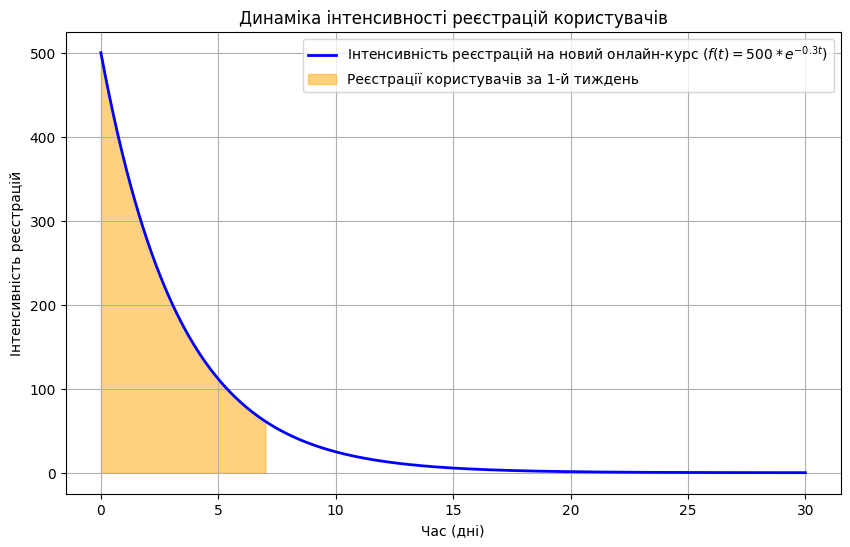

In [ ]:
# Завдання 3. Аналіз ефективності рекламної компанії (чисельний розв'язок)
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

#Визначемо функцію інтенсивності
def f(t):
    return 500* np.exp(-0.3*t)

# Обчислимо інтеграл від 0 до 7
numerical_result, _ = quad(f, 0, 7)
print(f"Чисельне значення інтегралу від 0 до 7: {numerical_result:.2f}")

# Діапазон часу (від 0 до 30 днів)
t_values = np.linspace(0, 30, 500)
f_values = f(t_values)

# Діапазон для першого тиждня (від 0 до 7 днів)
t_week1 = np.linspace(0, 7, 50)
f_week1 = f(t_week1)

plt.figure(figsize=(10, 6))
plt.plot(t_values, f_values, label='Інтенсивність реєстрацій на новий онлайн-курс ($f(t)=500*e^{-0.3t}$)', color='blue', linewidth=2)

# Заповнення під кривою для першого тижня
plt.fill_between(t_week1, f_week1, color='orange', alpha=0.5, label='Реєстрації користувачів за 1-й тиждень')
plt.title('Динаміка інтенсивності реєстрацій користувачів')
plt.xlabel('Час (дні)')
plt.ylabel('Інтенсивність реєстрацій')
plt.legend()
plt.grid(True)
plt.show()

- - -
**Обчислення теоретичного максимуму реєстрацій:**

Знайдемо невласний інтеграл:
$$ \int_{0}^{∞}500 \cdot e^{-0.3t}dt$$
при $t \to ∞$ значення $e^{-0.3t} \to ∞$, тому
$$ \int_{0}^{∞}500 \cdot e^{-0.3t}dt= \frac {500}{0.3}(1-\lim_{t \to ∞} e^{-0.3t})=\frac {500}{0.3} ≈ 1666.67$$

**Відповідь:**
Теоретичний максимум нових користувачів становить приблизно 1667 реєстрацій.

- - -
**Визначаємо ефективність першого тижня:**
$$ Ефективність=\frac {1462.57}{16667.67}\cdot 100 \% \approx 87.75 \% $$

**Висновок:**

За перший тиждень EdTech-компанія реалізує майже 88\% усього потенційного обсягу реєстрацій на новий онлайн-курс. Це свідчить про дуже високу концентрацію інтересу на старті. Після перших 7 днів інтенсивність реєстрацій стрімко падає.

- - -

**Завдання 4. Аналіз функції двох змінних**

Дано функцію двох змінних:
$$ ff(x,y)=0.5x^2+0.3y^2+0.2xy+10x+5y$$

**1. Знайдемо частинні похідні аналітично**:\
Щоб знайти частинну похідну по $x$, ми вважаємо $y$ константою:
$$\frac{\mathrm{d} f}{\mathrm{d} x}=\frac{\mathrm{d}}{\mathrm{d} x}⋅(0.5x^2)+\frac{\mathrm{d}}{\mathrm{d} x}⋅(0.3y^2)+\frac{\mathrm{d}}{\mathrm{d} x}⋅(0.2xy)+\frac{\mathrm{d}}{\mathrm{d} x}⋅(10x)+\frac{\mathrm{d}}{\mathrm{d} x}⋅(5y)$$
$$\frac{\mathrm{d} f}{\mathrm{d} x}=1.0x+0+0.2y+10+0=x+0.2y+10 $$

Аналогічно для $y$, вважаючи $x$ константою:
$$\frac{\mathrm{d} f}{\mathrm{d} y}= \frac{\mathrm{d}}{\mathrm{d} y}⋅(0.5x^2)+\frac{\mathrm{d}}{\mathrm{d} y}⋅(0.3y^2)+\frac{\mathrm{d}}{\mathrm{d} y}⋅(0.2xy)+\frac{\mathrm{d}}{\mathrm{d} y}⋅(10x)+\frac{\mathrm{d}}{\mathrm{d} y}⋅(5y)$$

$$\frac{\mathrm{d} f}{\mathrm{d} y}=0+0.6y+0.2x+0+5=0.6y+0.2x+5 $$


**2. Обчислємо значення частинних похідних за аналітичними формулами з пункту 1 для точки (10,20).**\
Градієнт у точці (10, 20) \
Підставимо $x=10$, $y=20$: \
$$\frac{\mathrm{d} f}{\mathrm{d} x}(10, 20)= 10+0.2 \cdot 20+10=24$$,
$$\frac{\mathrm{d} f}{\mathrm{d} y}(10, 20)= 0.6 \cdot 20 + 0.2 \cdot 10 +5=19$$
отже,
$$ \bigtriangledown f(10,20)= (24, 19) $$

- - -



In [2]:
# 3. Аналіз функції двох змінних. Обчислення градієнту чисельно, використовуючи функцію 'approx_fprime' з бібліотеки 'scipy.optimimize'
import numpy as np
from scipy.optimize import approx_fprime

# Визначення функції
def f(params):
    x, y = params
    return 0.5*x**2 + 0.3*y**2 + 0.2*x*y + 10*x + 5*y

# Точка обчислення
point = np.array([10.0, 20.0])
epsilon = np.sqrt(np.finfo(float).eps) # Стандартний крок для approx_fprime

# Чисельне обчислення через SciPy
grad_numerical = approx_fprime(point, f, epsilon)

print(f"Чисельний градієнт:   {grad_numerical}")


Чисельний градієнт:   [24. 19.]


- - -
**3. Результати порівняння аналітичного та чисельного розрахунку:**
*   Аналітично: $ \bigtriangledown f(10,20)= (24, 19) $
*   Чисельно: $ \bigtriangledown f(10,20)= (24.0, 19.0) $

**Висновок:** \
Результати співпадають

**4. Оцінка зміни функції.**

Знайдемо наближену зміну $\Delta f$, якщо $x$ збільшиться на $0.5$ ($\Delta x = 0.5$), а $y$ зменшиться на $0.3$ ($\Delta y = -0.3$).\
Наближена зміна (лінійна апроксимація):Використовуємо формулу $\Delta f \approx \frac{\partial f}{\partial x} \cdot \Delta x + \frac{\partial f}{\partial y} \cdot \Delta y$:$$\Delta f \approx 24 \cdot (0.5) + 19 \cdot (-0.3)$$
$$\Delta f \approx 12 - 5.7 = 6.3$$

Точна зміна: \
Обчислимо різницю значень функції: $$\Delta f = f(10.5, 19.7) - f(10, 20)$$
$$f(10, 20) = 0.5(100) + 0.3(400) + 0.2(200) + 10(10) + 5(20) = 50 + 120 + 40 + 100 + 100 = 410$$
$$f(10.5, 19.7) = 0.5(110.25) + 0.3(388.09) + 0.2(206.85) + 10(10.5) + 5(19.7)=\\
= 55.125 + 116.427 + 41.37 + 105 + 98.5 = 416.422$$
$$\Delta f = 416.422 - 410 = 6.422$$

Порівняння:
*   Наближена зміна: 6.3
*   Точна зміна: 6.422 \
Різниця між точною зміною та лінійною складає: 6.422-6.3=0.122
---

